# 0. Préambule et configurations

Dans cette section, nous importons les bibliothèques nécessaires et notre jeu de données, qui est basé sur les informations du site **MyAnimeList** (2023).

## Bibliothèques utilisées

- **Pandas** : manipulation et analyse de données.
- **Matplotlib.pyplot** et **Seaborn** : visualisation des données.
- **NumPy** : création et gestion de valeurs nulles.

---

## Description des colonnes du jeu de données

- **anime_id** : Identifiant unique de l'animé.
- **Name** : Nom original de l'animé.
- **English name** : Titre de l'animé en anglais.
- **Other name** : Nom dans le système d'écriture japonais (Kanji, Hiragana, Katakana).
- **Score** : Note moyenne attribuée par les utilisateurs de MyAnimeList (2023).
- **Genres** : Genres associés à l'animé.
- **Type** : Format de l'animé (ex. TV, Film, OAV).
- **Episodes** : Nombre total d'épisodes.
- **Aired** : Période de diffusion.
- **Status** : Statut actuel (terminé ou en cours de diffusion en 2023).
- **Studios** : Studio de production.
- **Source** : Origine de l'animé (manga, light novel, création originale, etc.).
- **Duration** : Durée moyenne d’un épisode ou du film.
- **Rating** : Classification par tranche d’âge (public visé).
- **Rank** : Classement global basé sur le score.
- **Popularity** : Classement basé sur le nombre de membres.
- **Favorites** : Nombre d’utilisateurs ayant mis l’animé en favori.
- **Scored By** : Nombre d'utilisateurs ayant attribué une note à l'animé.
- **Members** : Nombre d’utilisateurs ayant ajouté l’animé à leur profil.
- **Season** : Saison de première diffusion.
- **Year** : Année de première diffusion.

---

### Remarque
Ce jeu de données a été **nettoyé** (voir Partie 1 : Traitement des données).
Les colonnes suivantes ont été supprimées :
- **Producers** : Producteurs de l’animé.
- **Aired** : Saison et année de diffusion, séparé en Year et Season
- **Licensors** : Détenteurs des licences (Japon et international).
- **Synopsis** : Résumé ou scénario de l’animé.
- **Image URL** : Lien vers l’affiche de l’animé sur MyAnimeList.


In [452]:
# Import de nos librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Style global
sns.set_theme(style="whitegrid", context="notebook")
path = "./data/anime-dataset-2023.csv"


# 2. Premières impressions et statistiques générales

In [453]:
# On importe notre jeu de données
df = pd.read_csv(path)

In [475]:
print("Dimensions :", df.shape)

Dimensions : (15691, 21)


In [479]:
print("Les colonnes de notre jeu de données :\n", df.columns)

Les colonnes de notre jeu de données :
 Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Type', 'Episodes', 'Aired', 'Status', 'Studios', 'Source', 'Duration',
       'Rating', 'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members',
       'Season', 'Year'],
      dtype='object')


In [458]:
# On jette un œil au nombre unique de valeurs de chaque ligne
df.nunique()

anime_id        15691
Name            15691
English name     7915
Other name      14917
Score             566
Genres            952
Type                6
Episodes          192
Aired           11332
Status              2
Studios          1353
Source             16
Duration          315
Rating              7
Rank             9684
Popularity      12499
Favorites        1799
Scored By        8280
Members         10564
Season              4
Year               63
dtype: int64

In [459]:
# On affiche les cinq premières lignes
df.head()

,anime_id,Name,English name,Other name,Score,Genres,Type,Episodes,Aired,Status,...,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Season,Year
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Finished Airing,...,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,Spring,1998
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi",Movie,1.0,"Sep 1, 2001",Finished Airing,...,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,NaN,<NA>
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Finished Airing,...,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,Spring,1998
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,"Jul 3, 2002 to Dec 25, 2002",Finished Airing,...,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,Summer,2002
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Finished Airing,...,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,Fall,2004


In [460]:
# On affiche les cinq dernières lignes
df.tail()

,anime_id,Name,English name,Other name,Score,Genres,Type,Episodes,Aired,Status,...,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Season,Year
24590,55355,Li Shi Zhentan Shiwusuo: A Day in Lungmen - Ho...,Lee's Detective Agency: A Day in Lungmen - Hom...,《鲤氏侦探事务所》迷你剧先行短片 - Home Service,5.99,"Action, Comedy, Mystery",ONA,1.0,"Oct 24, 2021",Finished Airing,...,Game,3 min,PG-13 - Teens 13 or older,8891.0,14796,1,129.0,518,NaN,<NA>
24635,55404,Slash,Slash,slash,6.45,UNKNOWN,Music,1.0,"May 22, 2023",Finished Airing,...,Original,4 min,PG-13 - Teens 13 or older,NaN,16801,1,152.0,333,NaN,<NA>
24729,55517,The IDOLM@STER Cinderella Girls: U149 Recap,UNKNOWN,アイドルマスター シンデレラガールズ U149,6.07,UNKNOWN,Special,1.0,"May 25, 2023",Finished Airing,...,Web manga,23 min,PG-13 - Teens 13 or older,8521.0,15097,1,114.0,482,NaN,<NA>
24831,55647,One Piece: Dai Gekisen Tokushuu! Hangeki Doume...,One Piece: Recapping Fierce Fights! The Counte...,大激戦特集！反撃同盟VSビッグ・マム,6.29,"Action, Adventure, Comedy, Fantasy",Special,1.0,"Jun 18, 2023",Finished Airing,...,Manga,24 min,PG-13 - Teens 13 or older,7480.0,14291,1,320.0,593,NaN,<NA>
24856,55676,Fins,Fins,Fins,6.45,UNKNOWN,Music,1.0,"Jun 6, 2023",Finished Airing,...,Original,4 min,G - All Ages,NaN,14842,2,194.0,512,NaN,<NA>


# 2. Nettoyage du jeu de données

Cette section est consacrée au **nettoyage et à la préparation** de notre jeu de données.
Après analyse et recherche, les étapes suivantes ont été réalisées :

- **Suppression des entrées incomplètes** :
  Les animés dont le **Score** ou le **Type** n’est pas renseigné ont été retirés.

- **Remplacement des valeurs "Unknown"** :
  Les sources ayant la valeur `"Unknown"` ont été remplacées par `"Other"`.

- **Conversion des types de données** :
  Les colonnes initialement au format `object` — **Score**, **Episodes**, **Rank**, **Scored By** — ont été converties en **format numérique**.

- **Extraction des informations de diffusion** :
  À partir de la colonne **Aired**, nous avons créé deux colonnes distinctes :
  - **Year** : année de première diffusion,
  - **Season** : saison de première diffusion (Winter, Spring, Summer, Fall).
  La colonne **Aired** originale a été supprimée.


In [454]:
# TRI DES DONNEES
# Avant de commencer notre analyse, un tri doit être effectué, on retire les animés avec des données non pertinentes : Score non renseigné, ou colonnes qui ne seront pas analysée.
df = df.loc[(df["Score"] != "UNKNOWN") & (df["Type"] != "UNKNOWN")]
df = df.drop(columns=["Producers", "Licensors", "Synopsis", "Image URL"])
df["Source"] = df["Source"].replace("Unknown", "Other")
df["Score"] = pd.to_numeric(df["Score"], errors="coerce")
df["Episodes"] = pd.to_numeric(df["Episodes"], errors="coerce")
df["Rank"] = pd.to_numeric(df["Rank"], errors="coerce")
df["Scored By"] = pd.to_numeric(df["Scored By"], errors="coerce")

# On supprime les doublons
df = df.drop_duplicates()

In [455]:

def split_premiered(value):
    """ Sépare les valeurs de la colonne Premiered, afin de pouvoir
    avoir une colonne Season et une colonne Year.
    :param value:
    Valeurs de la colonne Premiered.
    :return:
    Une série qui contient une partie Season et une partie Year, qui sont donc séparés.
    """
    if pd.isna(value) or value == "UNKNOWN":
        return pd.Series([np.nan, np.nan])
    parts = value.split()
    if len(parts) == 2:
        season, year = parts
        year = int(year)
        season = season[0].upper() + season[1:]
        return pd.Series([season, year])
    return pd.Series([np.nan, np.nan])

df[['Season', 'Year']] = df['Premiered'].apply(split_premiered)
df = df.drop(columns="Premiered")

# Conversion en Int64, un type d'entier propre à Pandas
df['Year'] = df['Year'].astype('Int64')

# Statistiques

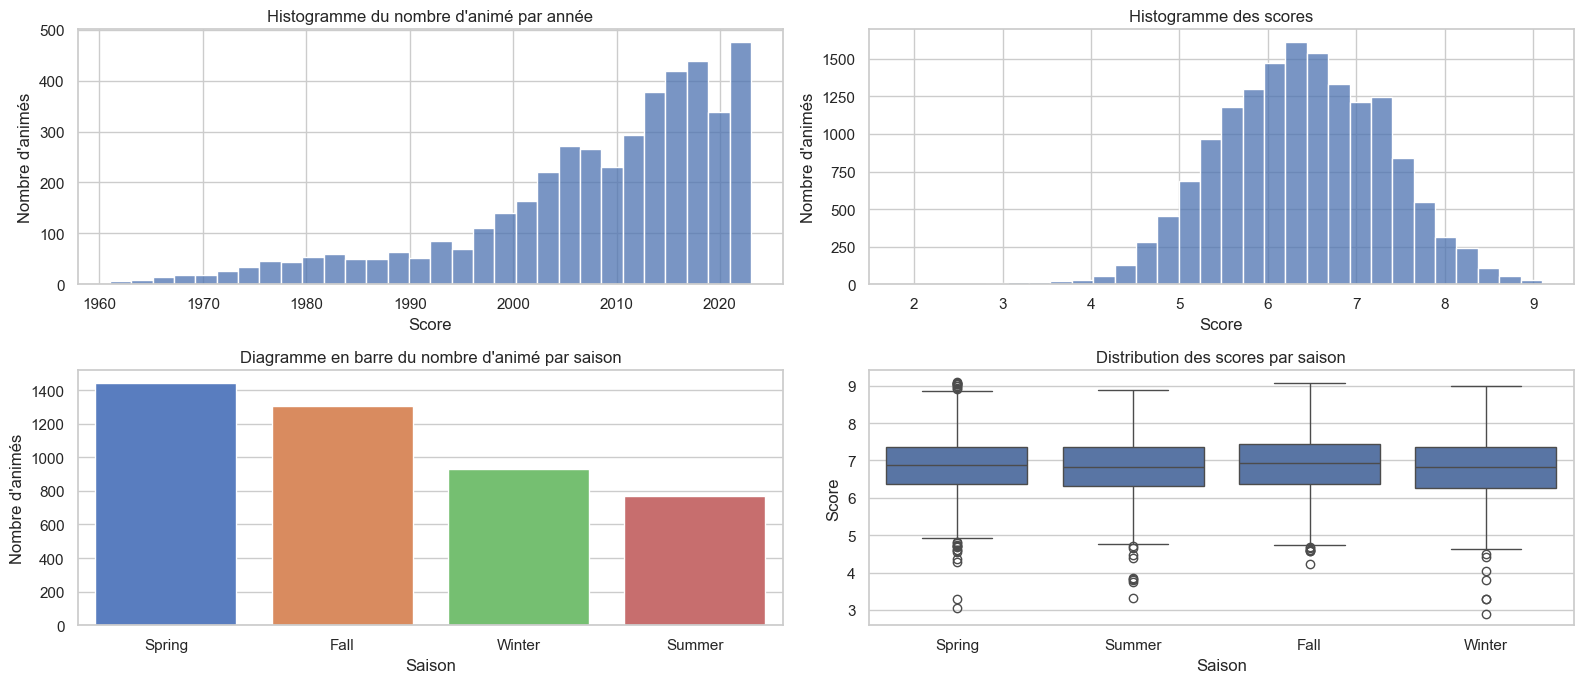

In [461]:
fig, axes = plt.subplots(2, 2, figsize=(16, 7))

ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]


sns.histplot(data=df, ax=ax1, x="Year", bins=30)
ax1.set_title("Histogramme du nombre d'animé par année")
ax1.set_xlabel("Score")
ax1.set_ylabel("Nombre d'animés")


sns.histplot(data=df, ax=ax2, x="Score", bins=30)
ax2.set_title("Histogramme des scores")
ax2.set_xlabel("Score")
ax2.set_ylabel("Nombre d'animés")


counts_season = df["Season"].value_counts()
df_counts = counts_season.reset_index()
df_counts.columns = ["Season", "Counts"]

sns.barplot(data=df_counts, ax=ax3, x="Season", y="Counts", hue="Season", legend=False, palette="muted")
ax3.set_title("Diagramme en barre du nombre d'animé par saison")
ax3.set_xlabel("Saison")
ax3.set_ylabel("Nombre d'animés")


sns.boxplot(data=df, x="Season", y="Score", ax=ax4)
ax4.set_title("Distribution des scores par saison")
ax4.set_xlabel("Saison")
ax4.set_ylabel("Score")


plt.tight_layout()
plt.show()


Type
TV         4482
OVA        3283
Movie      2475
Special    2039
ONA        1929
Music      1483
Name: count, dtype: int64


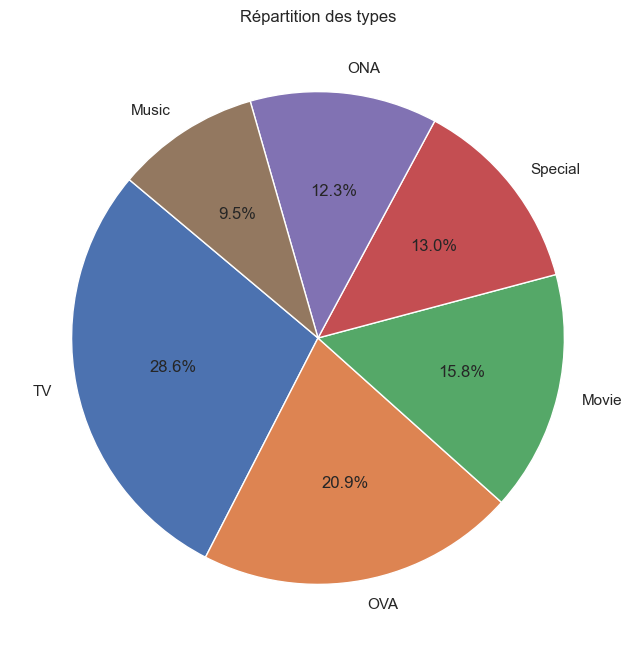

In [462]:
# Répartition du type d'animé
counts = df["Type"].value_counts()
print(counts)
plt.figure(figsize=(8,8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des types")
plt.show()

Source
Original        4545
Manga           4150
Other           2251
Visual novel    1089
Game             956
Light novel      877
Novel            540
Web manga        315
Music            313
4-koma manga     280
Mixed media      112
Book              91
Card game         65
Picture book      55
Web novel         42
Radio             10
Name: count, dtype: int64


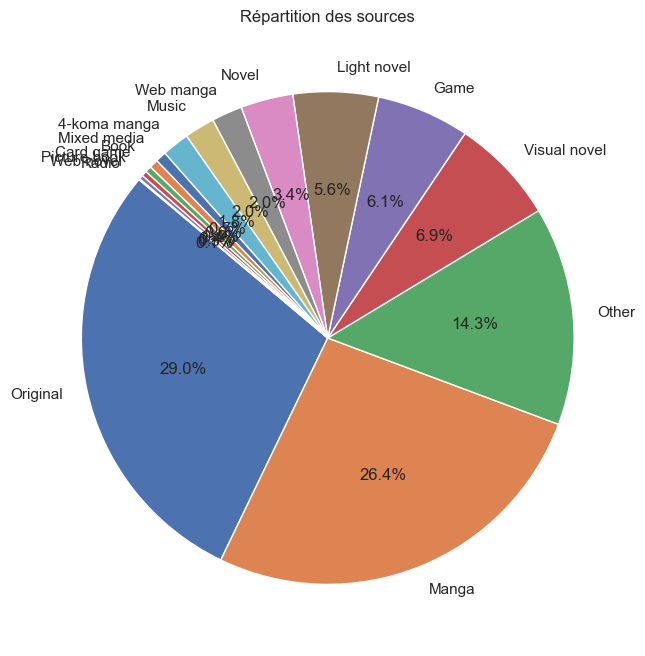

In [463]:
# Répartition des sources d'adaptation
counts = df["Source"].value_counts()
print(counts)
plt.figure(figsize=(8,8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des sources")
plt.show()

Remarque : Other désigne tout ce qui n'appartient aux formats d'adaptations classiques, comme par exemple les animés réalisés pour promouvoir des jouets (exemple : BeyBlade).

## 1. TV
Nous commençons notre analyse détaillée du jeu de données en prenant tout d'abord le Type TV, dans lequel nous analyserons les scores, ou encore la popularité.

Ce que le type TV désigne sont bien sûr les diffusions à travers la télévision, donc principalement des animés. On parlera ainsi essentiellement d'animé, si besoin, on précisera qu'il s'agit du type TV.

Un animé désigne l'adaptation d'un manga, d'un light novel (roman), d'un visual novel (jeu), ou une création originale dans un format dessin animé dont un studio d'animation est en charge.
On effectue la nuance avec "dessin animé" (cartoon), qui est associé à l'Occident (Europe, États-Unis), là où un "animé", proviendra donc d'Asie, principalement du Japon, mais aussi de la Corée du Sud et de la Chine.

In [464]:
# On récupère uniquement nos TV du jeu de données
df_anime = df[df["Type"] == "TV"]

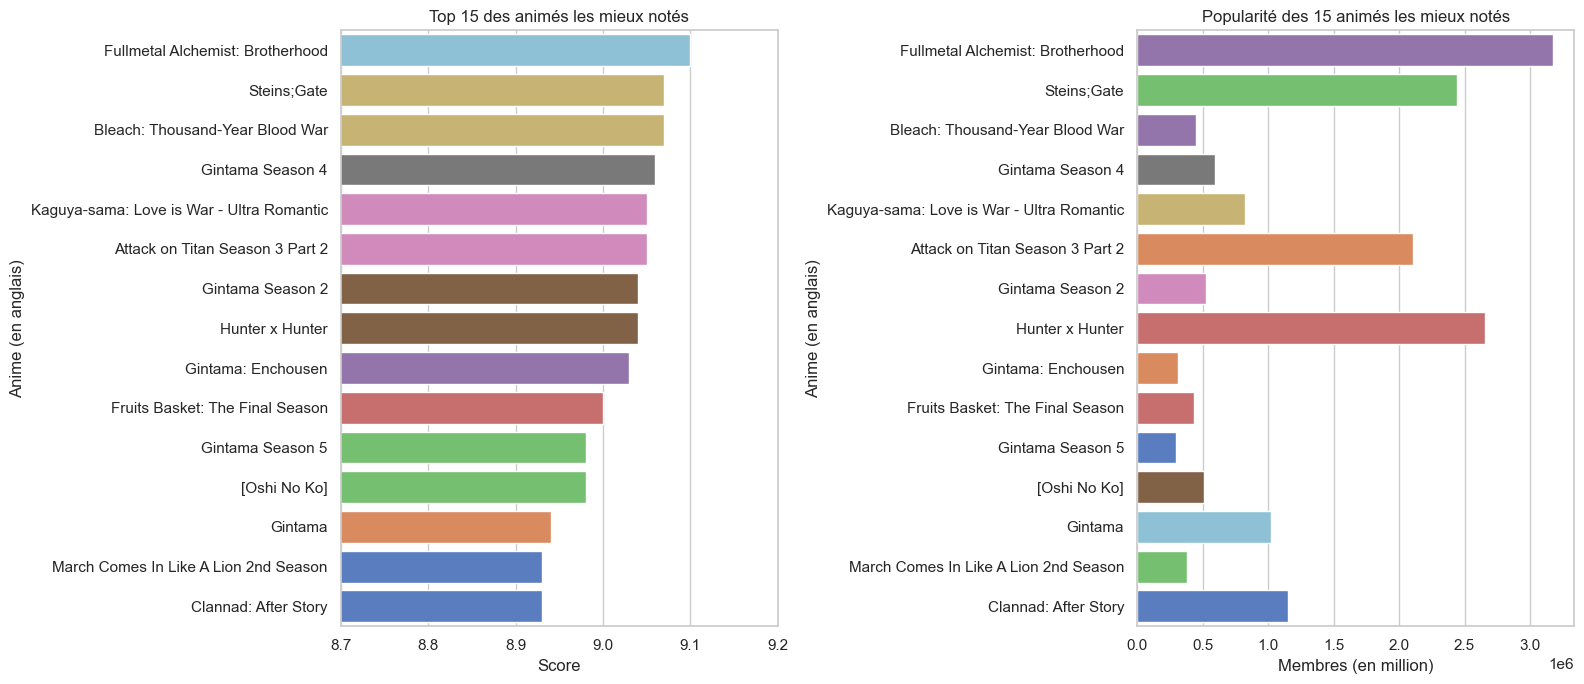

In [465]:
# --- Données : top 15 par score ---
top15_score = df_anime.sort_values(by="Score", ascending=False).head(15)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

sns.barplot(
    x="Score",
    y="English name",
    data=top15_score,
    hue="Score",
    palette="muted",
    dodge=False,
    ax=ax1,
    legend=False)
ax1.set_xlabel("Score")
ax1.set_ylabel("Anime (en anglais)")
ax1.set_xlim(8.7, 9.2)
ax1.set_title("Top 15 des animés les mieux notés")

sns.barplot(
    x="Members",
    y="English name",
    data=top15_score,
    hue="Members",
    palette="muted",
    dodge=False,
    ax=ax2,
    legend=False)
ax2.set_xlabel("Membres (en million)")
ax2.set_ylabel("Anime (en anglais)")
ax2.set_title("Popularité des 15 animés les mieux notés")

plt.tight_layout()
plt.show()


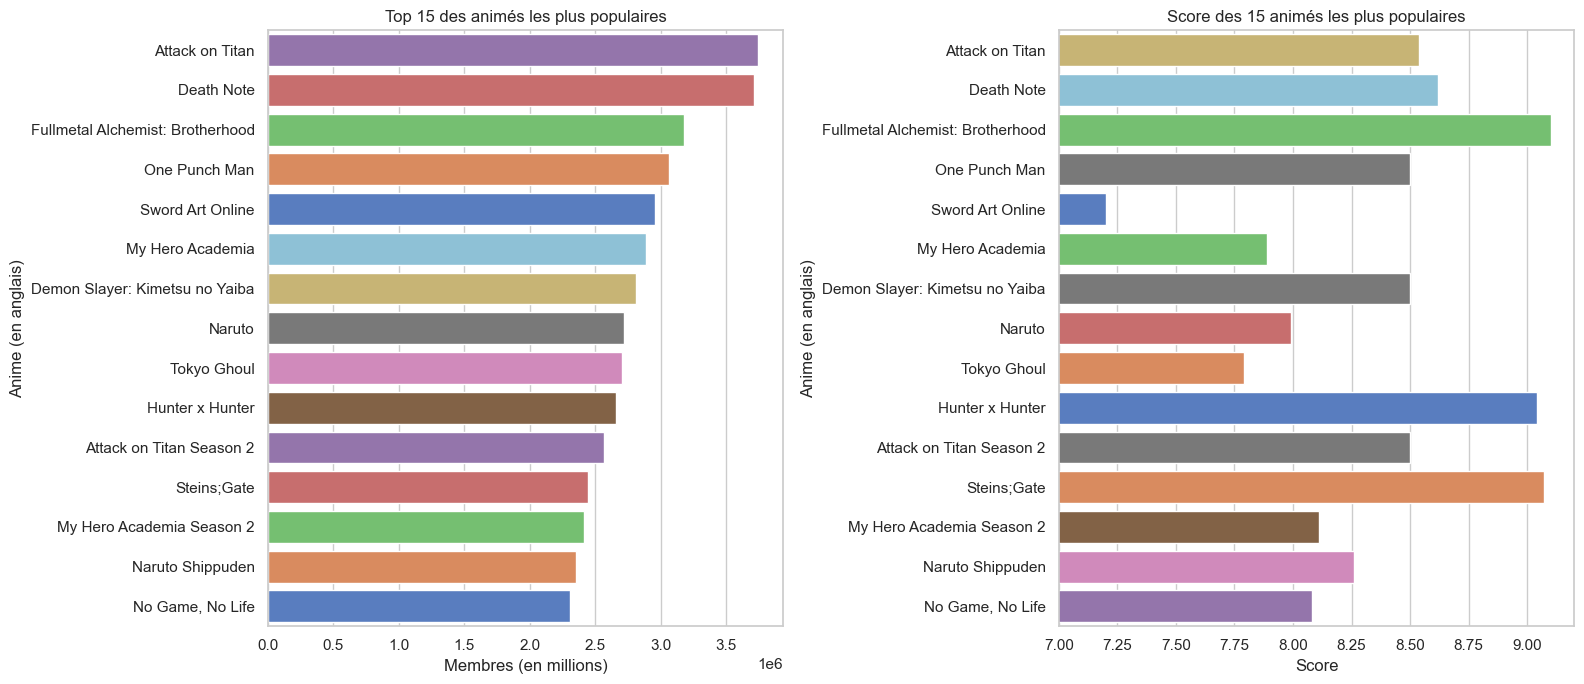

In [466]:
# --- Données : top 15 par popularité ---
top15_pop = df_anime.sort_values(by="Members", ascending=False).head(15)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

sns.barplot(
    x="Members",
    y="English name",
    data=top15_pop,
    hue="Members",
    palette="muted",
    dodge=False,
    legend=False,
    ax=ax1
)
ax1.set_xlabel("Membres (en millions)")
ax1.set_ylabel("Anime (en anglais)")
ax1.set_title("Top 15 des animés les plus populaires")

sns.barplot(
    x="Score",
    y="English name",
    data=top15_pop,
    hue="Score",
    palette="muted",
    dodge=False,
    legend=False,
    ax=ax2
)
ax2.set_xlabel("Score")
ax2.set_ylabel("Anime (en anglais)")
ax2.set_title("Score des 15 animés les plus populaires")
ax2.set_xlim(7, 9.2)

plt.tight_layout()
plt.show()

- Une grande partie des animés populaires possèdent de bons scores, entre 8 et 9.
- Sword Art Online est le moins bien noté de loin par rapport à tous les autres.
- Fullmetal Alchemist : Brotherhood, Steins ;Gate et Hunter x Hunter sont à la fois dans le top 15 en popularité et en score.
- Il y a beaucoup moins de disparité entre le score et la popularité par rapport aux œuvres les mieux notés du site.

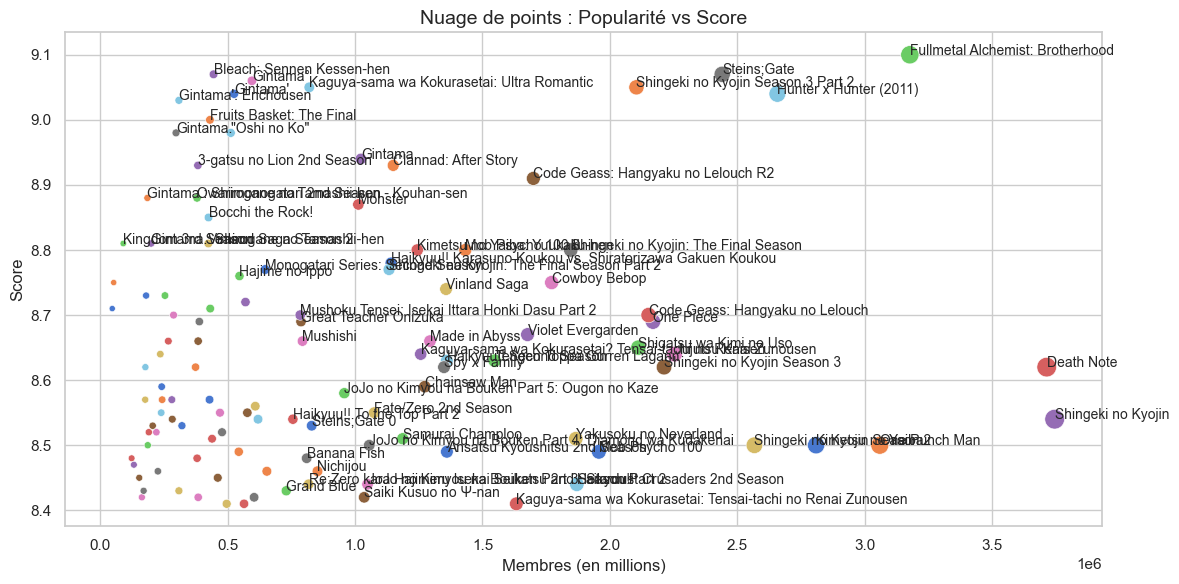

In [467]:
df_anime_limite= df_anime[df_anime["Score"]>8.4]
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_anime_limite,
    x="Members",
    y="Score",
    size="Members",
    sizes=(20, 200),
    hue="Members",
    palette="muted",
    legend=False
)

# Ajouter les labels uniquement pour certains points
texts = []
for i in range(len(df_anime_limite)):
    if (df_anime_limite["Score"].iloc[i] > 8.75) or (df_anime_limite["Members"].iloc[i] > 700000):
        texts.append(
            plt.text(
                x=df_anime_limite["Members"].iloc[i],
                y=df_anime_limite["Score"].iloc[i],
                s=df_anime_limite["Name"].iloc[i],
                fontsize=10
            )
        )


# Mise en forme
plt.title("Nuage de points : Popularité vs Score", fontsize=14)
plt.xlabel("Membres (en millions)", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.tight_layout()
plt.show()

- Une grande partie du cluster possède entre 1 et 2 millions de membres.
- Shingeki no Kyojin et Death Note dominent de loin en termes de popularité.
- FMAB, HxH et Steins ;Gate sont également à la fois populaire et bien noté : ils laissent un gros écart au reste.
- On retrouve aussi un petit cluster parmi les moins populaires, qui possèdent toutefois de gros scores.
Nous allons donc procéder à une analyse plus poussée de ce petit cluster, renfermant des œuvres de qualité beaucoup moins côtés par la communauté.

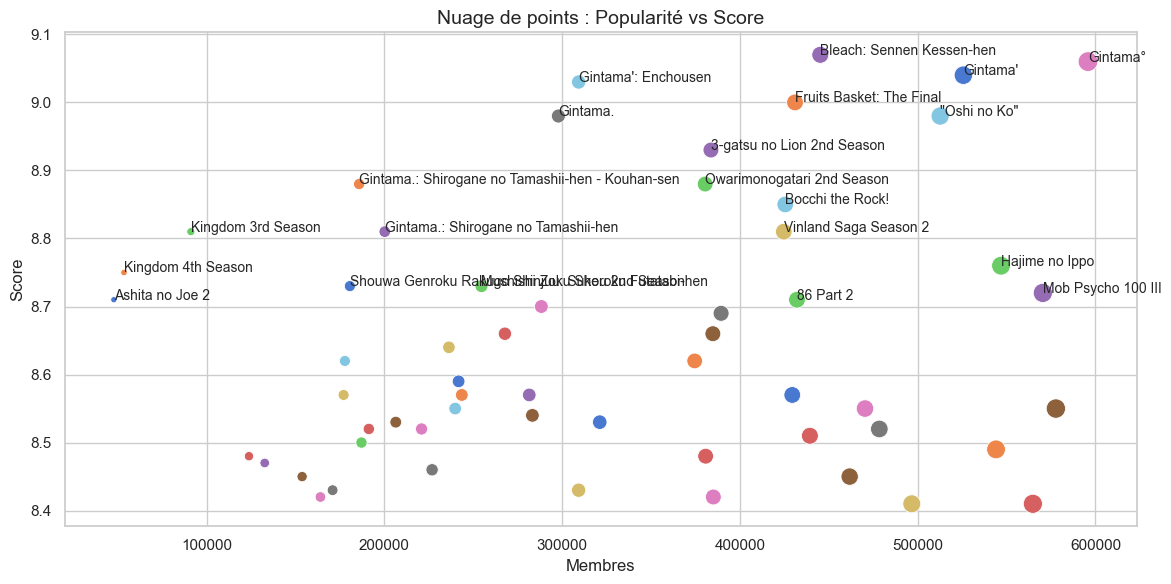

In [468]:
df_anime_limite = df_anime[(df_anime["Score"] > 8.4) & (df_anime["Members"] < 600000)]
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_anime_limite,
    x="Members",
    y="Score",
    size="Members",
    sizes=(20, 200),
    hue="Members",
    palette="muted",
    legend=False
)

# Ajouter les labels uniquement pour certains points
texts = []
for i in range(len(df_anime_limite)):
    if df_anime_limite["Score"].iloc[i] > 8.7:
        texts.append(
            plt.text(
                x=df_anime_limite["Members"].iloc[i],
                y=df_anime_limite["Score"].iloc[i],
                s=df_anime_limite["Name"].iloc[i],
                fontsize=10
            )
        )


# Mise en forme
plt.title("Nuage de points : Popularité vs Score", fontsize=14)
plt.xlabel("Membres", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.tight_layout()
plt.show()

- Gintama domine avec ses multiples saisons parmi les animés peu côtés.
- Kingdom et Ashita no Joe 2 sont les deux anomalies remarquables, un nombre très faible pour un excellent score.
- La présence de Bleach parmi ces échantillons peut surprendre, cependant il s'agit d'une suite à l'animé s'étant terminé en 2012.

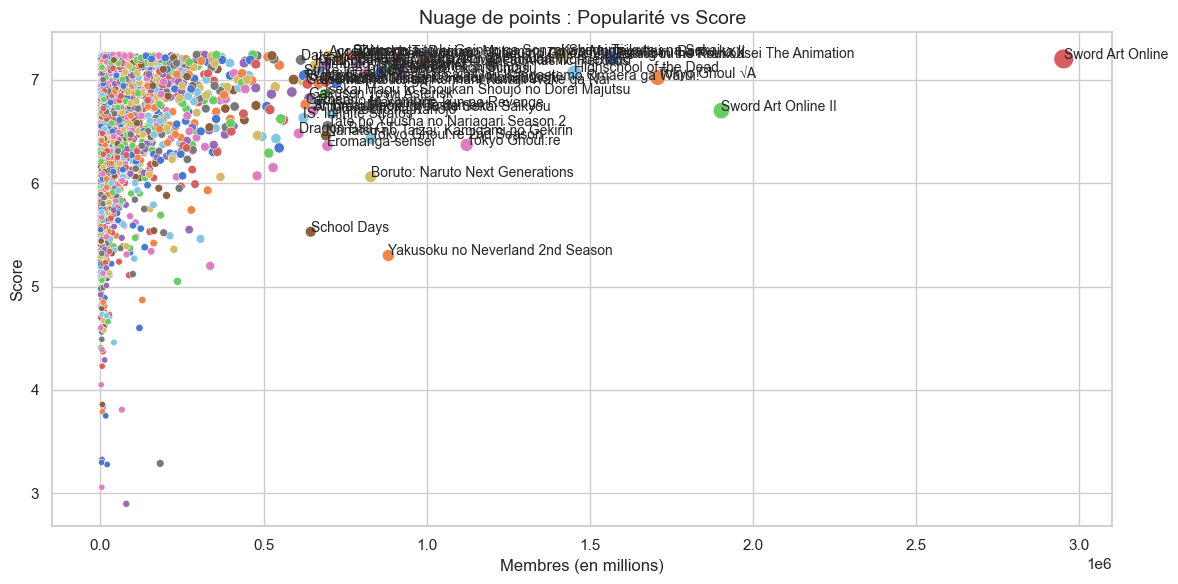

In [469]:
df_anime_limite = df_anime[df_anime["Score"] < 7.25]
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_anime_limite,
    x="Members",
    y="Score",
    size="Members",
    sizes=(20, 200),
    hue="Members",
    palette="muted",
    legend=False
)

# Ajouter les labels uniquement pour certains points
texts = []
for i in range(len(df_anime_limite)):
    if df_anime_limite["Members"].iloc[i] > 600000:
        texts.append(
            plt.text(
                x=df_anime_limite["Members"].iloc[i],
                y=df_anime_limite["Score"].iloc[i],
                s=df_anime_limite["Name"].iloc[i],
                fontsize=10
            )
        )


# Mise en forme
plt.title("Nuage de points : Popularité vs Score", fontsize=14)
plt.xlabel("Membres (en millions)", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.tight_layout()
plt.show()

## 2. Films d'animation

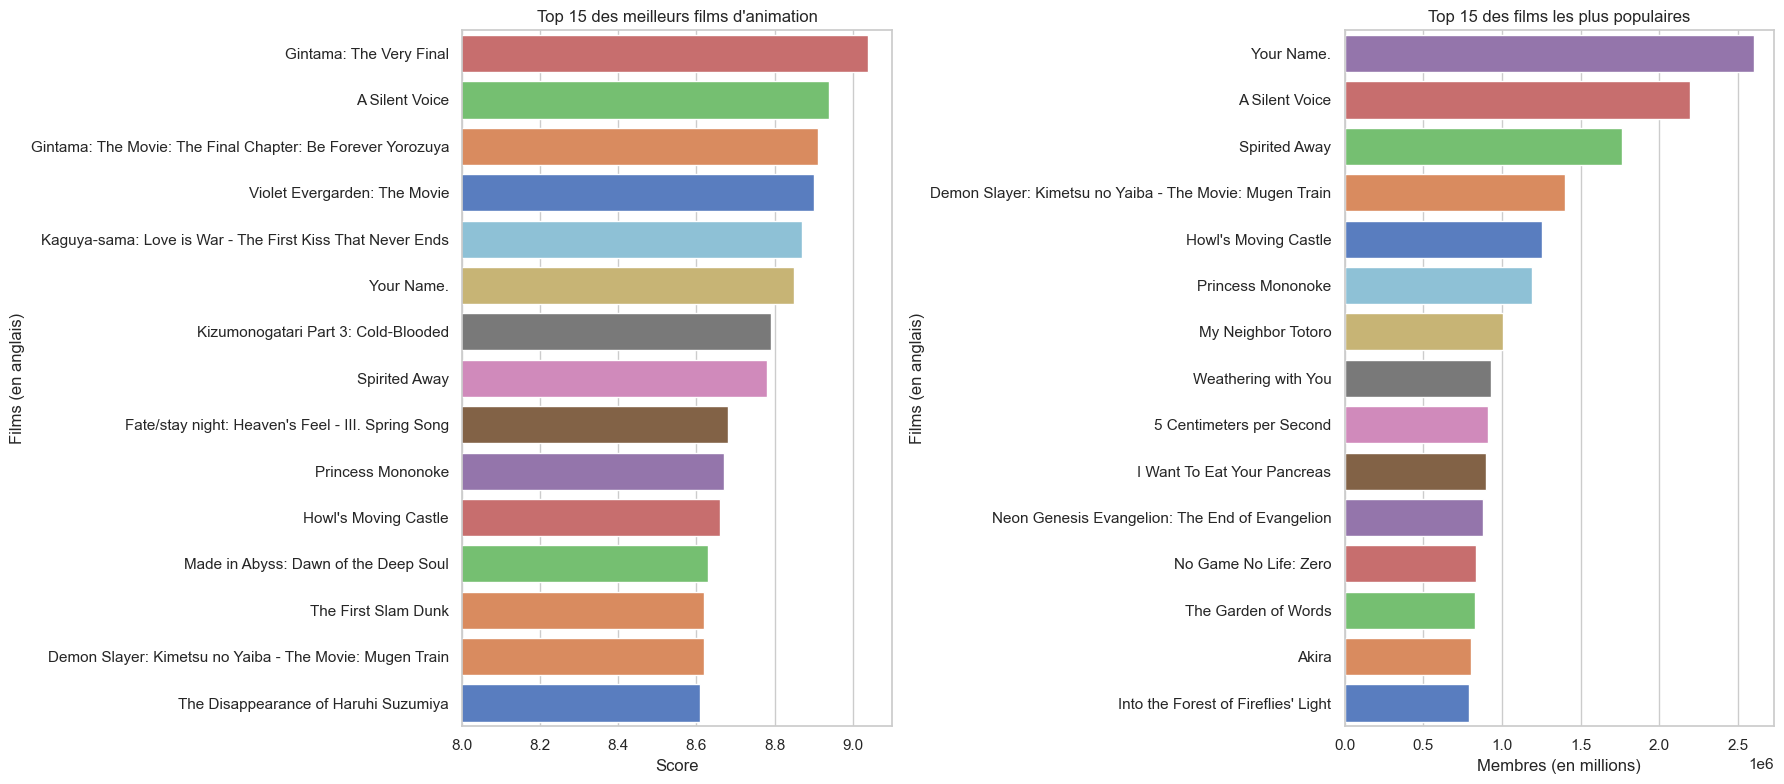

In [470]:
# On récupère uniquement les films
df_movie = df[df["Type"] == "Movie"]

# Correction des noms anglais pour certains titres
df_movie.loc[df_movie["anime_id"] == 45649, "English name"] = "The First Slam Dunk"
df_movie.loc[df_movie["Name"] == "No Game No Life: Zero", "English name"] = "No Game No Life: Zero"

# --- Données : top 15 par score ---
top15_score = df_movie.sort_values(by="Score", ascending=False).head(15)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(
    data=top15_score,
    y="English name",
    x="Score",
    palette="muted",
    hue="Score",
    legend=False,
    ax=ax1
)
ax1.set_title("Top 15 des meilleurs films d'animation")
ax1.set_xlabel("Score")
ax1.set_ylabel("Films (en anglais)")
ax1.set_xlim(8, 9.1)


# --- Données : top 15 par popularité ---
top15_pop = df_movie.sort_values(by="Members", ascending=False).head(15)


sns.barplot(
    data=top15_pop,
    y="English name",
    x="Members",
    palette="muted",
    hue="Members",
    legend=False,
    ax=ax2
)
ax2.set_title("Top 15 des films les plus populaires")
ax2.set_xlabel("Membres (en millions)")
ax2.set_ylabel("Films (en anglais)")

plt.tight_layout()
plt.show()


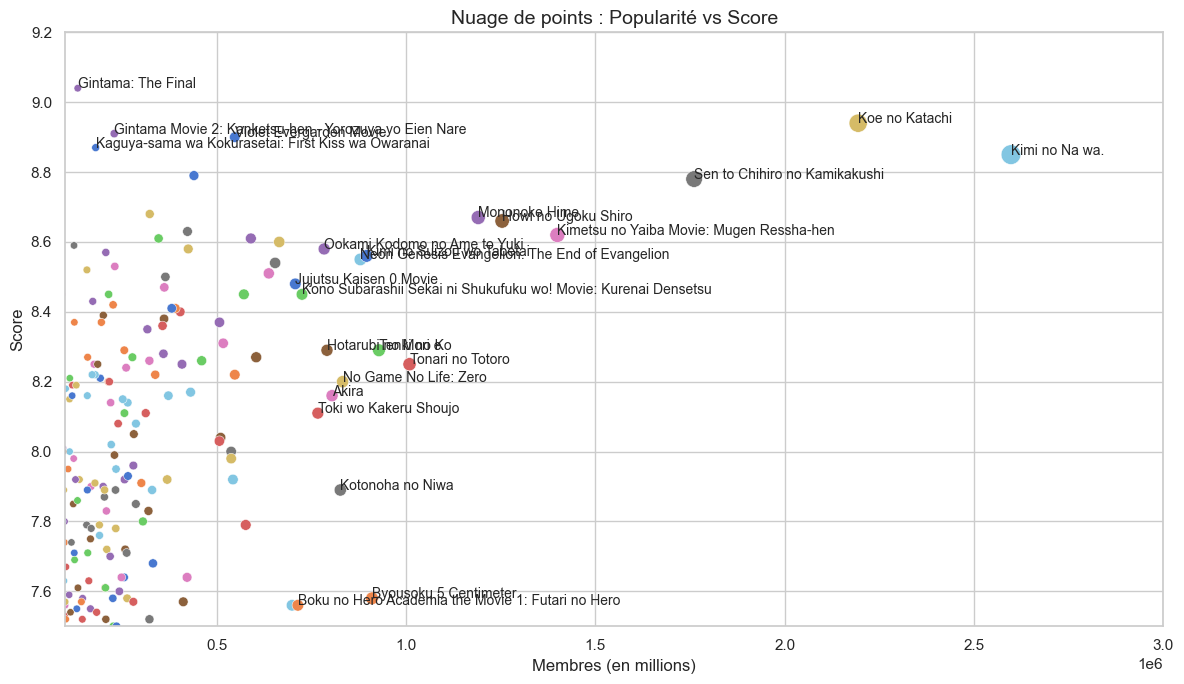

In [471]:
df_movie = df[df["Type"] == "Movie"]

plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=df_movie,
    x="Members",
    y="Score",
    size="Members",
    sizes=(20, 200),
    hue="Members",
    palette="muted",
    legend=False
)

# Ajouter les labels uniquement pour certains points
texts = []
for i in range(len(df_movie)):
    if (df_movie["Score"].iloc[i] > 8.8) or (df_movie["Members"].iloc[i] > 700000):
        texts.append(
            plt.text(
                x=df_movie["Members"].iloc[i],
                y=df_movie["Score"].iloc[i],
                s=df_movie["Name"].iloc[i],
                fontsize=10
            )
        )


# Mise en forme
plt.title("Nuage de points : Popularité vs Score", fontsize=14)
plt.xlabel("Membres (en millions)", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.ylim(7.5, 9.2)
plt.xlim(100000, 3000000)
plt.tight_layout()
plt.show()

## 3. OAV

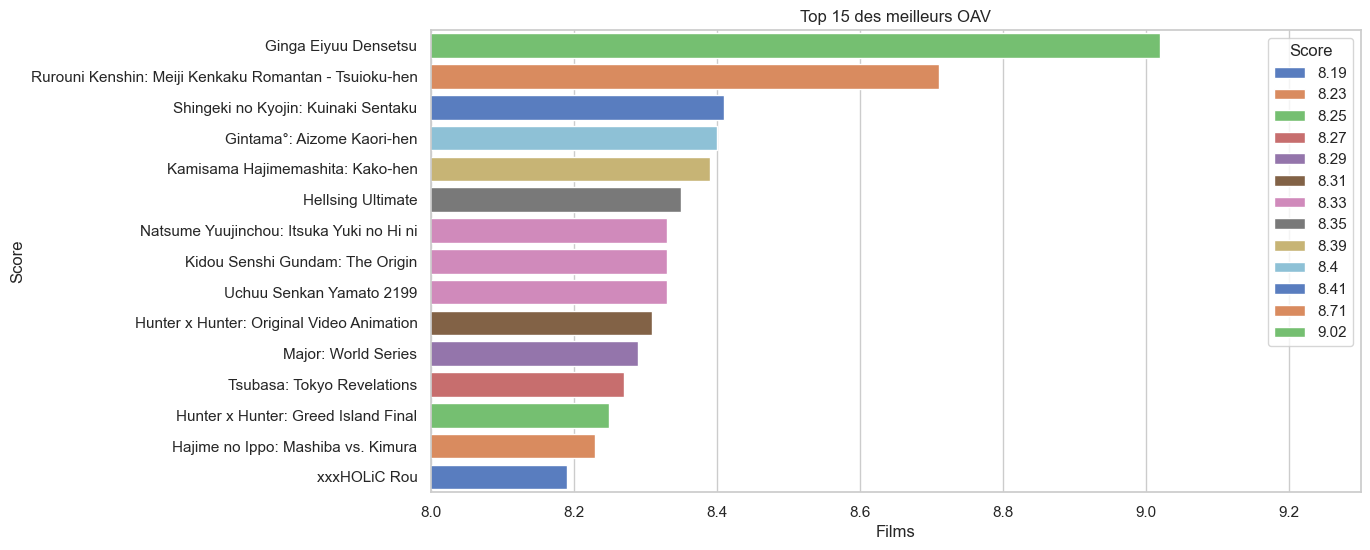

In [472]:
plt.figure(figsize=(12, 6))
df_score = df[df["Type"] == "OVA"]
top15 = df_score.sort_values(by="Score", ascending=False).head(15)
sns.barplot(data=top15, x="Score", y="Name", hue="Score", palette="muted")
plt.title("Top 15 des meilleurs OAV")
plt.xlim(8, 9.3)
plt.ylabel("Score")
plt.xlabel("Films")

plt.show()

## 4. ONA
Un ONA, ou Original Net Anime, est un animé diffusé directement sur Internet, à travers des plateformes de streaming. Il n'est donc pas diffusé à la télévision.
Nous pouvons prendre l'exemple de Netflix qui diffuse JoJo Bizarre Adventure : Stone Ocean, ou Cyberpunk Edgerunners.

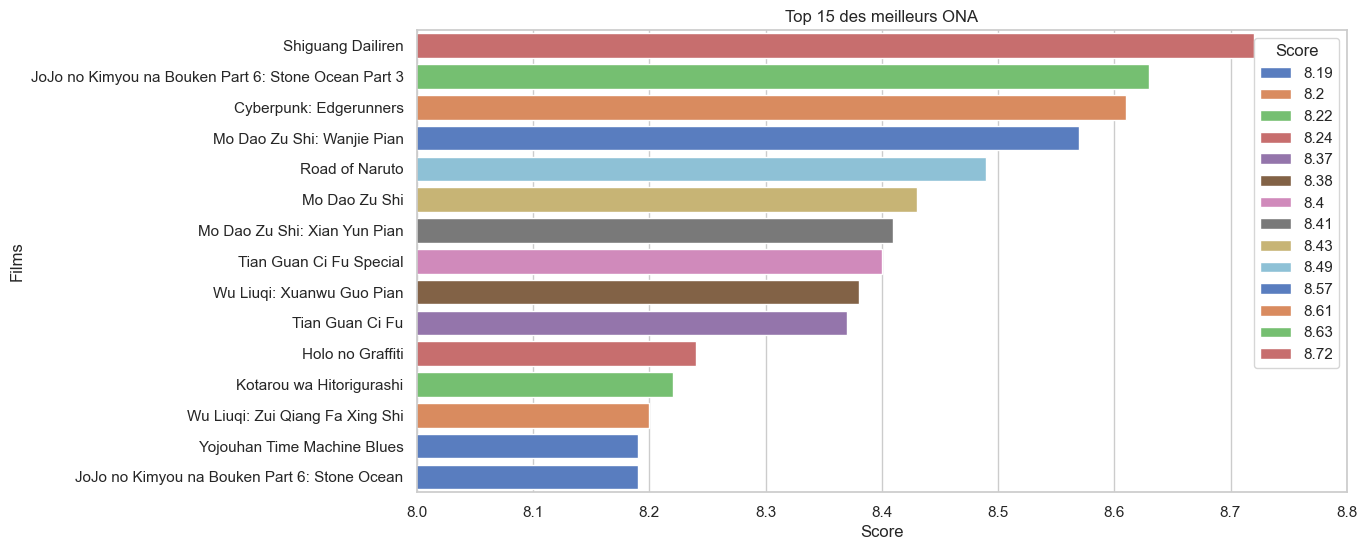

In [473]:
plt.figure(figsize=(12, 6))
df_score = df[df["Type"] == "ONA"]
top15 = df_score.sort_values(by="Score", ascending=False).head(15)
sns.barplot(data=top15, y="Name", x="Score", hue="Score", palette="muted")
plt.title("Top 15 des meilleurs ONA")
plt.xlim(8, 8.8)
plt.xlabel("Score")
plt.ylabel("Films")

plt.show()

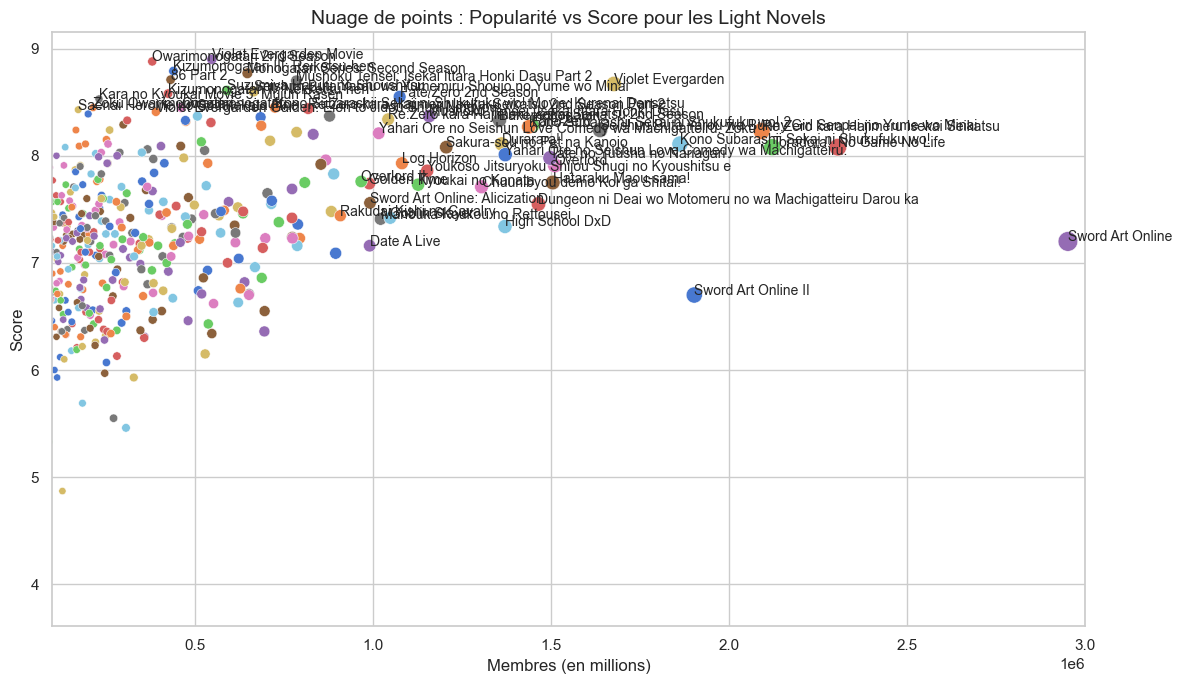

In [474]:
df_ln = df[df["Source"] == "Light novel"]

plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=df_ln,
    x="Members",
    y="Score",
    size="Members",
    sizes=(20, 200),
    hue="Members",
    palette="muted",
    legend=False
)

# Ajouter les labels uniquement pour certains points
texts = []
for i in range(len(df_ln)):
    if (df_ln["Score"].iloc[i] > 8.4) or (df_ln["Members"].iloc[i] > 900000):
        texts.append(
            plt.text(
                x=df_ln["Members"].iloc[i],
                y=df_ln["Score"].iloc[i],
                s=df_ln["Name"].iloc[i],
                fontsize=10
            )
        )


# Mise en forme
plt.title("Nuage de points : Popularité vs Score pour les Light Novels", fontsize=14)
plt.xlabel("Membres (en millions)", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xlim(100000, 3000000)
plt.tight_layout()
plt.show()

- Une grande partie du cluster comporte des animés peu populaire dont le score est compris entre 6 et 8.5.
- L'autre partie du cluster représente les Light Novel populaire, dont le score est supérieur à 7, et avec au moins 1 million de membre.
- Sword Art Online est de loin le light novel le plus populaire.

Le light novel est donc une source d'adaptation qui connait un très fort succès auprès du public, après les mangas